<a href="https://colab.research.google.com/github/trjgdyan/PCVK_Genap_2021/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama : Tri Jagad Ariyani**
# **Kelas : 3CTI**
# **NIM : 2141720049**


# MODUL 12 - Feature Matching, Face Detection, Face Tracking

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
seperti biasa.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut.

Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection
dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah
bermasker, atau wajah yang berukuran kecil (solvay).

In [ ]:
def image_detection(image_path, face_cascade):

  # Convert to grayscale
  img_gray = cv2.cvtColor(cv2.imread(image_path),0, cv2.COLOR_BGR2GRAY)

  # Detect faces
  faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=4)

  # Draw rectangles around the faces
  for (x, y, w, h) in faces:
    cv2.rectangle(img_gray, (x, y), (x+w, y+h), (255, 255,0), 2)

  # Display the images
  plt.subplot(121), plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
  plt.title('Gambar Asli'), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
  plt.title('Hasil'), plt.xticks([]), plt.yticks([])

  plt.show()

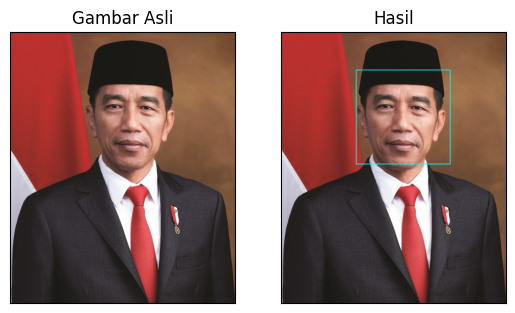

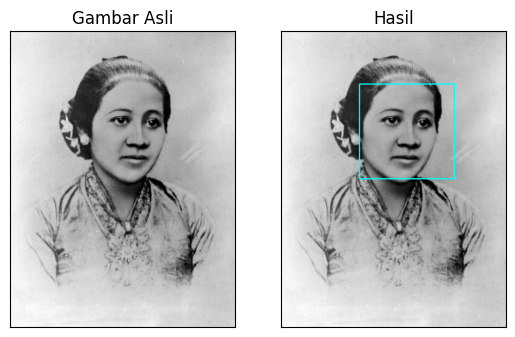

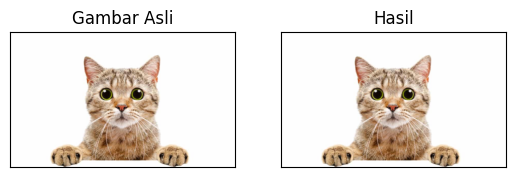

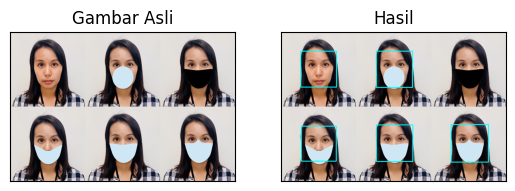

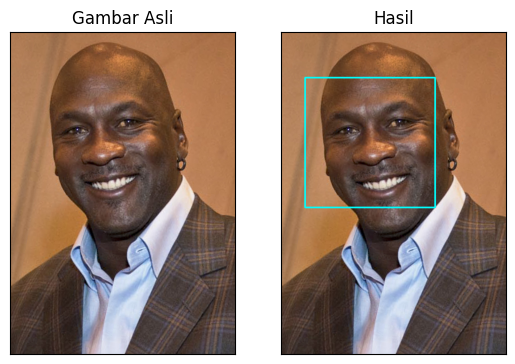

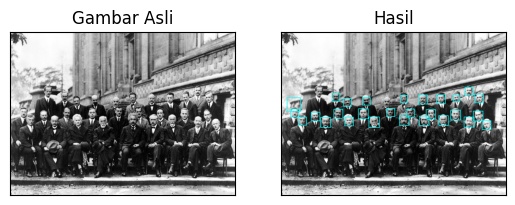

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')
image_path = [
    '/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg',
    '/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg',
    '/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg',
    '/content/drive/MyDrive/PCVK/Images/facedet/mask.png',
    '/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg',
    '/content/drive/MyDrive/PCVK/Images/facedet/solvayconf.jpg'
]
for image in image_path:
  image_detection(image, face_cascade)


3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.


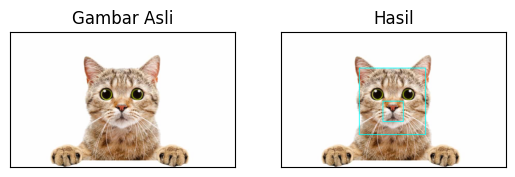

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalcatface.xml')
kucing = '/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg'

image_detection(kucing, face_cascade)

4. Cobakan juga untuk eyes detection.

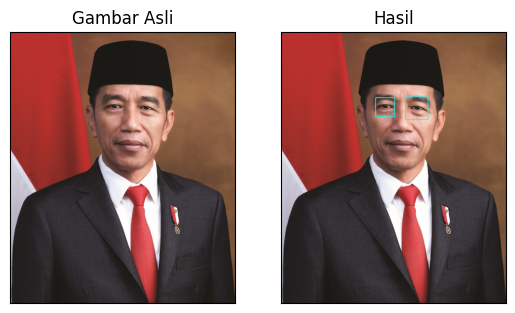

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_eye.xml')
jokowi = '/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg'

image_detection(jokowi, face_cascade)

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')

**Webcam Image**

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


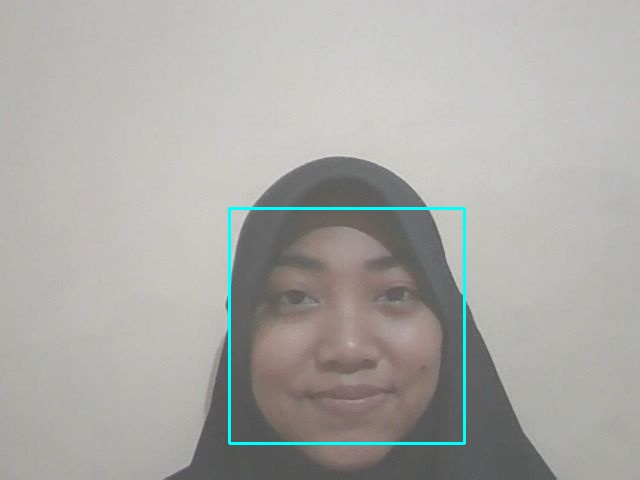

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**Webcam Video**

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,255),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

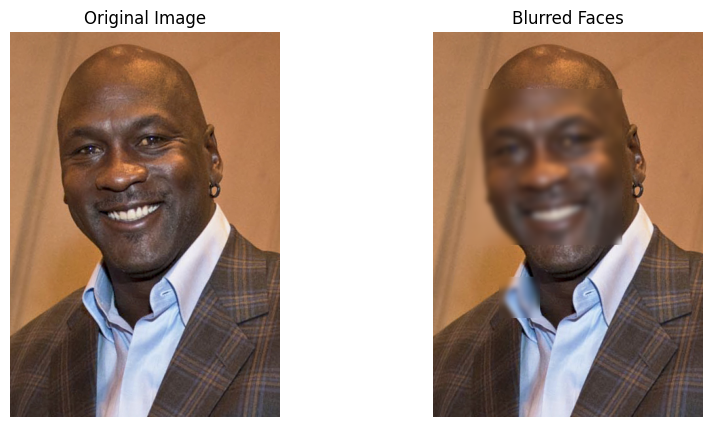

In [ ]:
# Fungsi untuk mendeteksi wajah dan mengaplikasikan blur
def detect_and_blur_faces(image_path):
    # Baca gambar
    image = cv2.imread(image_path)
    # Konversi gambar menjadi skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Menggunakan CascadeClassifier untuk deteksi wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Iterasi melalui wajah yang terdeteksi dan aplikasikan blur
    for (x, y, w, h) in faces:
        face_roi = image[y:y+h, x:x+w]
        # Aplikasikan blur menggunakan GaussianBlur
        blurred_face = cv2.GaussianBlur(face_roi, (99, 99), 4)
        # Tempatkan wajah yang di-blur ke dalam gambar asli
        image[y:y+h, x:x+w] = blurred_face

    return image

# Path gambar input
input_image_path = '/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg'

# Deteksi wajah, aplikasikan blur, dan tampilkan hasilnya
result_image = detect_and_blur_faces(input_image_path)

# Tampilkan gambar asli dan gambar hasil
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
plt.axis('off')

# Gambar hasil dengan wajah yang di-blur
plt.subplot(1, 2, 2)
plt.title('Blurred Faces')
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

7. Lakukan Segmentasi karakter pada KTP seperti gambar berikut

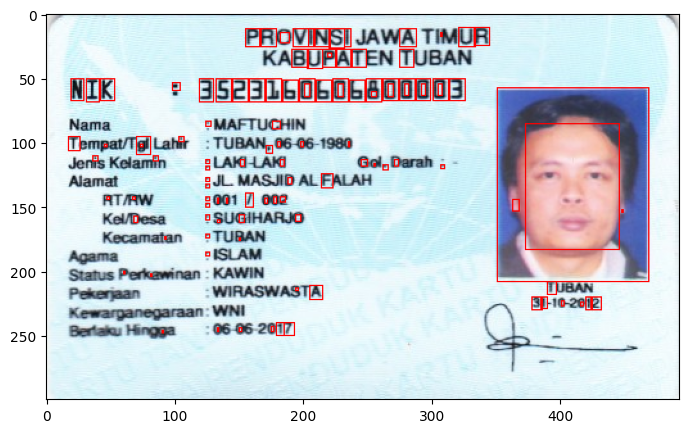

In [ ]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/images/KTP_More/ktp4.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

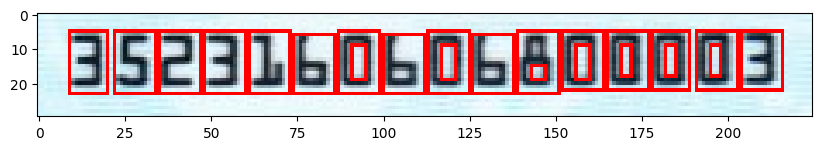

In [ ]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/images/KTP_More/ktp4.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktp[45:75, 110:335]

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.


In [5]:
import os
from tqdm import tqdm
import cv2
import random
import numpy as np
import pickle

# Direktori data training
DATADIR = "/content/drive/MyDrive/PCVK/training"
dirs = []

training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)

    # Memastikan path yang diakses adalah direktori
    if os.path.isdir(path):
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_ANYCOLOR)
                new_array = cv2.resize(img_array, (width, height))
                training_data.append([new_array, class_number])
            except Exception as e:
                pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
    X.append(feature)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

Penjelasan kode di atas adalah sebagai berikut ini

a. Import terlebih dahulu beberapa yang paket-paket yang dibutuhkan, ada beberapa
paket yang baru misalkan tqdm digunakan untuk meload data diikuti dengan
progress bar, numpy merupakan sebuah paket yang digunakan untuk melakukan
operasi-operasi matriks atau array serta pickle adalah depedensi untuk menyimpan file untuk model data training.


b. Looping data training yang kelak digunakan untuk melabeli hasil pengenalan.
Looping semua file training untuk diubah ke dalam sebuah image array.


c. Variabel X dan variabel Y digunakan untuk menyimpan label dan feature, label
berisi karakter A-Z dan 0-9 sedangkan feture berisi data image array masing-masing label tersebut.

d. Terakhir tulis isi variabel X dan variabel Y ke dalam sebuah file pickle. File pickle tersebut nanti akan diload ketika proses training data


10. Lakukan Training Data

Code berikut digunakan untuk melakukan training data

In [11]:
import os
import cv2
import random
import numpy as np
import pickle
from tqdm import tqdm
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Direktori data training
DATADIR = "/content/drive/MyDrive/PCVK/training"
dirs = []

training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    path = os.path.join(DATADIR, char_name)
    if os.path.isdir(path):  # Check if it's a directory
        dirs.append(char_name)
        class_number = dirs.index(char_name)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_ANYCOLOR)
                new_array = cv2.resize(img_array, (width, height))
                training_data.append([new_array, class_number])
            except Exception as e:
                pass

# Shuffle the training data
random.shuffle(training_data)

X = []
Y = []

for feature, label in training_data:
    X.append(feature)
    Y.append(label)

# Check if arrays are non-empty before further processing
if X and Y:
    X = np.array(X).reshape(-1, width, height, 3)  # Assuming the images are in color (3 channels)

    # Tulis ke file pickle
    pickle_out = open("X.pickle", "wb")
    pickle.dump(X, pickle_out)
    pickle_out.close()
    pickle_out = open("Y.pickle", "wb")
    pickle.dump(Y, pickle_out)
    pickle_out.close()

    # Load file pickle
    try:
        pickle_in = open("X.pickle", "rb")
        X = pickle.load(pickle_in)
        pickle_in = open("Y.pickle", "rb")
        Y = pickle.load(pickle_in)

        # Add checks for non-empty arrays before conversion
        if X.size > 0 and Y.size > 0:
            Y = to_categorical(Y)
            X = X / 255.0
        else:
            print("Error: Loaded arrays are empty or in unexpected format.")
    except Exception as e:
        print(f"Error during loading pickle files: {e}")

    # Split data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Input layer
    inputs = Input(shape=(width, height, 3))  # Assuming the images are in color (3 channels)
    conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
    conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
    conv_layer = MaxPooling2D((2, 2))(conv_layer)
    conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
    conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
    conv_layer = MaxPooling2D((2, 2))(conv_layer)
    conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
    flatten = Flatten()(conv_layer)
    fc_layer = Dense(256, activation='relu')(flatten)
    fc_layer = Dense(64, activation='relu')(fc_layer)

    # Output layer
    outputs = Dense(len(dirs), activation='softmax')(fc_layer)  # Output units equal to the number of classes
    adam = Adam(learning_rate=0.0001)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, verbose=1)

    # Evaluate the model
    accuracy = model.evaluate(X_test, Y_test)
    print("Test Accuracy:", accuracy[1])

    # Save the model
    model.save('anpr_model.h5')

Dengan kode di atas kita akan membuat sebuah model, kode di atas menggunakan
deep learning dengan arsitektur CNN(Convolutional Neural Network). Sebenarnya
yang saya ketahui perbedaan mendasar arsitektur ini dengan neural network biasa
adalah masalah feature extraction, feature merupakan sebuah ciri yang khas yang
membedakan antara objek satu dengan objek lainnya. Sebagai contoh karakter A dan karakter B pada pelat kendaraan tentunya memiliki ciri dengan bentuk yang berbeda. Feature extraction yang dimiliki CNN(Convolutional Neural Network) sudah disediakan, kita tinggal mengutak-utik arsitekturnya/parameter yang ada di dalamnya. Sedangkan neural network biasa kita harus mencari sendiri atau dilakukan secara manual untuk mencari feature tersebut. Di bawah ini adalah bagian kode yang digunakan untuk membuat atau membangun sebuah feature tersebut.

11. Testing Data
Contoh kode berikut digunakan untuk melakukan testing pengenalan karakter

In [12]:
import os
import cv2
import tensorflow as tf
import numpy as np

data_dir_training = "/content/drive/MyDrive/PCVK/training"  # Correct path for training data
data_dir_testing = "/content/drive/MyDrive/PCVK/training"
dirs = []
width, height = 100, 100

model = tf.keras.models.load_model("anpr.model")

for char_name in sorted(os.listdir(data_dir_training)):
    dirs.append(char_name)

for car in sorted(os.listdir(data_dir_testing)):
    temp = ""
    for char_img in sorted(os.listdir(os.path.join(data_dir_testing, car))):
        img_array = cv2.imread(os.path.join(data_dir_testing, car, char_img), cv2.IMREAD_ANYCOLOR)
        new_array = cv2.resize(img_array, (width, height))
        new_array = np.array(new_array).reshape(-1, width, height, 3)  # Assuming images are in color (3 channels)
        new_array = new_array / 255.0
        prediction = model.predict(new_array)
        temp += dirs[np.argmax(prediction[0])]

    print("folder name: {} no: {}".format(car, temp))

OSError: ignored

**TUGAS**
Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!